In [1]:
from google.colab import files
import pandas as pd

# Upload file from local system
uploaded = files.upload()

# Read the uploaded CSV (replace the filename with yours if needed)
df = pd.read_csv(list(uploaded.keys())[0])

# Show the first few rows
df.head()


Saving my_patients.csv to my_patients.csv


,subject_id,height,weight,bmi,gender,age,admission_type,insurance_YN,race,heart_rate,...,chronic_obstructive_pulmonary_disease,peripheral_vascular_disease,dementia,peptic_ulcer_disease,liver_disease,paraplegia,renal_disease,congestive_heart_failure,heart_disease,copd
0,10010278,63.0,109.0,274.628370,F,59,SURGICAL SAME DAY ADMISSION,Y,UNKNOWN,109.832512,...,0,0,0,0,0,0,0,0,0,0
1,10010888,70.0,65.4,133.469388,M,43,EW EMER.,Y,WHITE,74.786364,...,0,0,0,0,0,0,0,0,0,0
2,10014702,62.0,82.6,214.880333,F,69,EW EMER.,Y,WHITE,103.778846,...,0,0,0,0,0,0,0,0,0,0
3,10015625,72.0,60.0,115.740741,M,91,EW EMER.,Y,WHITE,75.961039,...,0,0,0,0,0,0,0,0,0,0
4,10035618,68.0,100.8,217.993080,M,60,OBSERVATION ADMIT,Y,UNABLE TO OBTAIN,142.170543,...,0,0,0,0,0,0,0,0,0,0


In [2]:
missing_values = df.isna().sum()
print(missing_values)

subject_id                    0
height                      774
weight                        0
bmi                         775
gender                        0
                           ... 
paraplegia                    0
renal_disease                 0
congestive_heart_failure      0
heart_disease                 0
copd                          0
Length: 64, dtype: int64


In [3]:
missing_values = df.isna().sum()
missing_columns = missing_values[missing_values > 0]

print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
height                                 774
bmi                                    775
temperature                             27
pao2                                   873
fio2                                  4331
absolute_neutrophil_count             4355
absolute_lymphocytes_count             991
systolic_arterial_blood_pressure      1675
sdiastolic_arterial_blood_pressure    1674
peep                                   894
tidal_volumne                         1017
mechanical_ventilation                4379
platelet_count                           6
ph                                     872
crp                                   3492
serum_creatinine                         4
lactate                                187
bun                                      4
glucose                                  4
sodium                                   4
wbc                                      6
hb                                       4
potassium                

In [4]:
df = df.drop(columns=["absolute_neutrophil_count", "absolute_lymphocytes_count", "mechanical_ventilation",
                      "crp", "hemodialysis", "total_urine_output"])

In [5]:
# Count total unique rows in the DataFrame
unique_rows_count = df.drop_duplicates().shape[0]

print(f"Total unique rows: {unique_rows_count}")

Total unique rows: 4379


In [6]:
missing_values = df.isna().sum()
print(missing_values)

subject_id                                  0
height                                    774
weight                                      0
bmi                                       775
gender                                      0
age                                         0
admission_type                              0
insurance_YN                                0
race                                        0
heart_rate                                  0
respiratory_rate                            0
temperature                                27
spo2                                        0
paco2                                       0
pao2                                      873
fio2                                     4331
systolic_arterial_blood_pressure         1675
sdiastolic_arterial_blood_pressure       1674
peep                                      894
tidal_volumne                            1017
gcs_eye                                     0
gcs_verbal                        

In [7]:
print(df.dtypes)

subject_id                                 int64
height                                   float64
weight                                   float64
bmi                                      float64
gender                                    object
age                                        int64
admission_type                            object
insurance_YN                              object
race                                      object
heart_rate                               float64
respiratory_rate                         float64
temperature                              float64
spo2                                     float64
paco2                                    float64
pao2                                     float64
fio2                                     float64
systolic_arterial_blood_pressure         float64
sdiastolic_arterial_blood_pressure       float64
peep                                     float64
tidal_volumne                            float64
gcs_eye             

In [8]:
df["insurance"] = df["insurance_YN"].map({"Y": 1, "N": 0})
df = df.drop(columns=["insurance_YN"])

In [9]:
# Handeling missing values
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Step 1: Train-Test Split
X = df.drop('in_hospital_mortality', axis=1)  # Features (excluding the target column)
y = df['in_hospital_mortality']  # Target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Handle Missing Values
# For numerical columns (float64), impute with the median
numerical_cols = X_train.select_dtypes(include=['float64']).columns
numerical_imputer = SimpleImputer(strategy='median')
X_train[numerical_cols] = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = numerical_imputer.transform(X_test[numerical_cols])

# For categorical columns (object), impute with the mode (most frequent)
categorical_cols = X_train.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train[categorical_cols] = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test[categorical_cols] = categorical_imputer.transform(X_test[categorical_cols])

# Print the updated training and testing sets (for verification)
print(X_train.isnull().sum())  # Verify that missing values are handled
print(X_test.isnull().sum())  # Verify that missing values are handled


subject_id                               0
height                                   0
weight                                   0
bmi                                      0
gender                                   0
age                                      0
admission_type                           0
race                                     0
heart_rate                               0
respiratory_rate                         0
temperature                              0
spo2                                     0
paco2                                    0
pao2                                     0
fio2                                     0
systolic_arterial_blood_pressure         0
sdiastolic_arterial_blood_pressure       0
peep                                     0
tidal_volumne                            0
gcs_eye                                  0
gcs_verbal                               0
gcs_motor                                0
platelet_count                           0
ph         

In [10]:
# Adding map_or_vasopressors
import pandas as pd
from sklearn.model_selection import train_test_split

X_train['map_or_vasopressors'] = ((X_train['map'] < 70) | (X_train['vasopressors'] == 1)).astype(int)
X_test['map_or_vasopressors'] = ((X_test['map'] < 70) | (X_test['vasopressors'] == 1)).astype(int)

# Show the result for both training and testing data
print("Training DataFrame:")
print(X_train.head())

print("\nTesting DataFrame:")
print(X_test.head())



Training DataFrame:
      subject_id  height  weight         bmi gender  age     admission_type  \
2519    13787816    74.5    96.6  174.046214      M   37           EW EMER.   
1767    16618181    64.0    85.0  207.519531      F   77             URGENT   
1056    10011938    66.0   115.0  264.003673      F   57           EW EMER.   
2860    16951157    64.0    92.5  225.830078      F   46  OBSERVATION ADMIT   
2957    17805594    67.0   139.0  185.333695      M   43     EU OBSERVATION   

                        race  heart_rate  respiratory_rate  ...  dementia  \
2519  BLACK/AFRICAN AMERICAN   98.056277         25.220779  ...         0   
1767                   WHITE   82.847518         22.450355  ...         1   
1056                   WHITE   67.798602         16.092181  ...         0   
2860                   WHITE   90.865079         23.476190  ...         0   
2957                   WHITE   84.925926         14.296296  ...         0   

      peptic_ulcer_disease  liver_disease 

In [11]:
# Add 'pao2 / fio2_ratio' column to both training and testing DataFrames
X_train['pao2_fio2_ratio'] = X_train['pao2'] / (X_train['fio2'] / 100)
X_test['pao2_fio2_ratio'] = X_test['pao2'] / (X_test['fio2'] / 100)

# Show the result for both training and testing data
print("Training DataFrame:")
print(X_train[['pao2', 'fio2', 'pao2_fio2_ratio']].head())

print("\nTesting DataFrame:")
print(X_test[['pao2', 'fio2', 'pao2_fio2_ratio']].head())

Training DataFrame:
       pao2  fio2  pao2_fio2_ratio
2519   95.0  60.0       158.333333
1767   97.0  60.0       161.666667
1056   94.0  60.0       156.666667
2860  128.0  60.0       213.333333
2957   97.0  60.0       161.666667

Testing DataFrame:
       pao2  fio2  pao2_fio2_ratio
175    97.0  60.0       161.666667
3659   84.0  60.0       140.000000
3702  127.0  60.0       211.666667
2702   29.0  60.0        48.333333
3084  125.0  60.0       208.333333


In [12]:
# Add 'gcs' by summing the values of 'gcs_eye', 'gcs_verbal', and 'gcs_motor'
X_train['gcs'] = X_train['gcs_eye'] + X_train['gcs_verbal'] + X_train['gcs_motor']
X_test['gcs'] = X_test['gcs_eye'] + X_test['gcs_verbal'] + X_test['gcs_motor']

# Optionally, show the updated results for both datasets
print("Training Data with 'gcs' column:")
print(X_train[['subject_id', 'gcs']].head())

print("\nTesting Data with 'gcs' column:")
print(X_test[['subject_id', 'gcs']].head())

Training Data with 'gcs' column:
      subject_id   gcs
2519    13787816  15.0
1767    16618181   7.0
1056    10011938  15.0
2860    16951157  15.0
2957    17805594  15.0

Testing Data with 'gcs' column:
      subject_id   gcs
175     11784091  15.0
3659    13729279  15.0
3702    14071752  14.0
2702    15469099   3.0
3084    19009923  15.0


In [13]:
# Divide the values in 'pao2', 'fio2', and 'pao2_fio2_ratio' by 100
X_train[['pao2', 'fio2', 'pao2_fio2_ratio']] = X_train[['pao2', 'fio2', 'pao2_fio2_ratio']] / 100
X_test[['pao2', 'fio2', 'pao2_fio2_ratio']] = X_test[['pao2', 'fio2', 'pao2_fio2_ratio']] / 100

# Show the result for both training and testing data
print("Training DataFrame:")
print(X_train[['pao2', 'fio2', 'pao2_fio2_ratio']].head())

print("\nTesting DataFrame:")
print(X_test[['pao2', 'fio2', 'pao2_fio2_ratio']].head())

Training DataFrame:
      pao2  fio2  pao2_fio2_ratio
2519  0.95   0.6         1.583333
1767  0.97   0.6         1.616667
1056  0.94   0.6         1.566667
2860  1.28   0.6         2.133333
2957  0.97   0.6         1.616667

Testing DataFrame:
      pao2  fio2  pao2_fio2_ratio
175   0.97   0.6         1.616667
3659  0.84   0.6         1.400000
3702  1.27   0.6         2.116667
2702  0.29   0.6         0.483333
3084  1.25   0.6         2.083333


In [14]:
# Adding SOFA score
import pandas as pd
import numpy as np

# Function to compute SOFA score
def compute_sofa(df):
    df = df.copy()  # Avoid modifying the original dataframe

    # Respiratory (PaO₂/FiO₂ Ratio)
    df['sofa_resp'] = np.select(
        [df['pao2_fio2_ratio'] >= 400,
         df['pao2_fio2_ratio'] < 400,
         df['pao2_fio2_ratio'] < 300,
         df['pao2_fio2_ratio'] < 200,
         df['pao2_fio2_ratio'] < 100],
        [0, 1, 2, 3, 4], default=0)

    # Coagulation (Platelet Count)
    df['sofa_coag'] = np.select(
        [df['platelet_count'] >= 150,
         df['platelet_count'] < 150,
         df['platelet_count'] < 100,
         df['platelet_count'] < 50,
         df['platelet_count'] < 20],
        [0, 1, 2, 3, 4], default=0)

    # Liver (Bilirubin)
    df['sofa_liver'] = np.select(
        [df['bilirubin'] < 1.2,
         df['bilirubin'] < 2.0,
         df['bilirubin'] < 6.0,
         df['bilirubin'] < 12.0,
         df['bilirubin'] >= 12.0],
        [0, 1, 2, 3, 4], default=0)

    # Cardiovascular (MAP or Vasopressors)
    df['sofa_cardio'] = np.select(
        [df['map_or_vasopressors'] >= 70,
         df['map_or_vasopressors'] < 70],
        [0, 1], default=0)

    # CNS (GCS)
    df['sofa_cns'] = np.select(
        [df['gcs'] == 15,
         df['gcs'] >= 13,
         df['gcs'] >= 10,
         df['gcs'] >= 6,
         df['gcs'] < 6],
        [0, 1, 2, 3, 4], default=0)

    # Renal (Creatinine)
    df['sofa_renal'] = np.select(
        [df['serum_creatinine'] < 1.2,
         df['serum_creatinine'] < 2.0,
         df['serum_creatinine'] < 3.5,
         df['serum_creatinine'] < 5.0,
         df['serum_creatinine'] >= 5.0],
        [0, 1, 2, 3, 4], default=0)

    # Total SOFA Score
    df['sofa_score'] = df[['sofa_resp', 'sofa_coag', 'sofa_liver', 'sofa_cardio', 'sofa_cns', 'sofa_renal']].sum(axis=1)

    return df

# Compute SOFA on Both Training and Testing DataFrames
X_train = compute_sofa(X_train)
X_test = compute_sofa(X_test)

# Show Results
print("Training Data SOFA Scores:")
print(X_train[['subject_id', 'sofa_score'] + [col for col in X_train.columns if col.startswith("sofa_")]].head())

print("\nTesting Data SOFA Scores:")
print(X_test[['subject_id', 'sofa_score'] + [col for col in X_test.columns if col.startswith("sofa_")]].head())


Training Data SOFA Scores:
      subject_id  sofa_score  sofa_resp  sofa_coag  sofa_liver  sofa_cardio  \
2519    13787816           6          1          0           2            1   
1767    16618181           7          1          0           0            1   
1056    10011938           4          1          0           0            1   
2860    16951157           2          1          0           0            1   
2957    17805594           3          1          0           0            1   

      sofa_cns  sofa_renal  sofa_score  
2519         0           2           6  
1767         3           2           7  
1056         0           2           4  
2860         0           0           2  
2957         0           1           3  

Testing Data SOFA Scores:
      subject_id  sofa_score  sofa_resp  sofa_coag  sofa_liver  sofa_cardio  \
175     11784091           2          1          0           0            1   
3659    13729279           2          1          0           0     

In [15]:
# Adding SAPS II score
import numpy as np
import pandas as pd

# Function to calculate SAPS II score
def calculate_saps_ii(df):
    # Age (years)
    df['age_points'] = np.select([df['age'] < 55,
                                  (df['age'] >= 55) & (df['age'] < 75),
                                  df['age'] >= 75],
                                 [0, 10, 20], default=0)

    # Heart Rate (beats per minute)
    df['hr_points'] = np.select([df['heart_rate'] < 40,
                                 (df['heart_rate'] >= 40) & (df['heart_rate'] < 60),
                                 (df['heart_rate'] >= 60) & (df['heart_rate'] < 100),
                                 (df['heart_rate'] >= 100) & (df['heart_rate'] < 140),
                                 df['heart_rate'] >= 140],
                                [12, 6, 0, 6, 12], default=0)

    # Systolic Blood Pressure (mmHg)
    df['sbp_points'] = np.select([df['systolic_arterial_blood_pressure'] < 70,
                                  (df['systolic_arterial_blood_pressure'] >= 70) & (df['systolic_arterial_blood_pressure'] < 90),
                                  (df['systolic_arterial_blood_pressure'] >= 90) & (df['systolic_arterial_blood_pressure'] < 120),
                                  (df['systolic_arterial_blood_pressure'] >= 120) & (df['systolic_arterial_blood_pressure'] < 160),
                                  df['systolic_arterial_blood_pressure'] >= 160],
                                 [20, 10, 0, 10, 20], default=0)

    # Temperature (°C)
    df['temp_points'] = np.select([df['temperature'] < 36,
                                   (df['temperature'] >= 36) & (df['temperature'] < 38),
                                   df['temperature'] >= 38],
                                  [0, 0, 4], default=0)

    # Respiratory Rate (breaths per minute)
    df['resp_rate_points'] = np.select([df['respiratory_rate'] < 10,
                                        (df['respiratory_rate'] >= 10) & (df['respiratory_rate'] < 30),
                                        df['respiratory_rate'] >= 30],
                                       [16, 0, 20], default=0)

    # Oxygenation (PaO₂/FiO₂ ratio) - Simplified version
    df['pa02_fio2_points'] = np.select([df['pao2_fio2_ratio'] >= 400,
                                        (df['pao2_fio2_ratio'] >= 300) & (df['pao2_fio2_ratio'] < 400),
                                        (df['pao2_fio2_ratio'] >= 200) & (df['pao2_fio2_ratio'] < 300),
                                        (df['pao2_fio2_ratio'] >= 100) & (df['pao2_fio2_ratio'] < 200),
                                        df['pao2_fio2_ratio'] < 100],
                                       [0, 10, 20, 30, 40], default=0)


    # For simplicity, let's assume no chronic disease, pH, bicarbonate, urea, and creatinine
    # (You can modify the above function to incorporate more variables as needed)

    # Total SAPS II Score
    df['saps_ii_score'] = df[['age_points', 'hr_points', 'sbp_points', 'temp_points',
                               'resp_rate_points', 'pa02_fio2_points', 'gcs']].sum(axis=1)

    return df

# Calculate SAPS II for both training and testing data
X_train = calculate_saps_ii(X_train)
X_test = calculate_saps_ii(X_test)

# Show the results
print("Training Data with SAPS II:")
print(X_train[['subject_id', 'saps_ii_score']].head())

print("\nTesting Data with SAPS II:")
print(X_test[['subject_id', 'saps_ii_score']].head())


Training Data with SAPS II:
      subject_id  saps_ii_score
2519    13787816           59.0
1767    16618181           71.0
1056    10011938           79.0
2860    16951157           59.0
2957    17805594           59.0

Testing Data with SAPS II:
      subject_id  saps_ii_score
175     11784091           69.0
3659    13729279           69.0
3702    14071752           68.0
2702    15469099           57.0
3084    19009923           59.0


In [16]:
# Print data types of all columns in X_train
print(X_train.info)

<bound method DataFrame.info of       subject_id  height  weight         bmi gender  age  \
2519    13787816    74.5    96.6  174.046214      M   37   
1767    16618181    64.0    85.0  207.519531      F   77   
1056    10011938    66.0   115.0  264.003673      F   57   
2860    16951157    64.0    92.5  225.830078      F   46   
2957    17805594    67.0   139.0  185.333695      M   43   
...          ...     ...     ...         ...    ...  ...   
3444    12067363    67.0    70.8  157.718868      F   50   
466     14619085    68.0    83.0  179.498270      M   76   
3092    19061282    69.0    61.0  128.124344      M   48   
3772    14673876    67.0    98.2  218.756961      M   68   
860     18189739    65.0    64.2  151.952663      M   91   

                   admission_type                      race  heart_rate  \
2519                     EW EMER.    BLACK/AFRICAN AMERICAN   98.056277   
1767                       URGENT                     WHITE   82.847518   
1056                  

In [17]:
# Adding APACHE II score
import pandas as pd
import numpy as np

def calculate_apache_ii_score(row):
    """
    Calculate APACHE II score for a single patient

    Parameters:
    row: A pandas Series or dictionary containing patient data

    Returns:
    int: APACHE II score (0-71)
    """
    score = 0

    # Temperature (°C)
    temp = row.get('temperature')
    if temp is not None:
        if temp >= 41 or temp < 30:
            score += 4
        elif 39 <= temp < 41:
            score += 3
        elif 38.5 <= temp < 39:
            score += 1
        elif 36 <= temp < 38.5:
            score += 0
        elif 34 <= temp < 36:
            score += 1
        elif 32 <= temp < 34:
            score += 2
        elif 30 <= temp < 32:
            score += 3

    # Mean Arterial Pressure (mmHg)
    # Mean Arterial Pressure (mmHg)
    map_value = row.get('map')

# If MAP is not directly available, calculate it from systolic and diastolic blood pressure
    if map_value is None:
      systolic = row.get('systolic_arterial_blood_pressure')
      diastolic = row.get('diastolic_arterial_blood_pressure')
      if systolic is not None and diastolic is not None:
          try:
              map_value = (float(systolic) + 2 * float(diastolic)) / 3
          except ValueError:
              map_value = None  # Handle cases where values can't be converted to float

    if map_value is not None:
      if map_value >= 160 or map_value < 50:
          score += 4
      elif 130 <= map_value < 160:
          score += 3
      elif 110 <= map_value < 130:
          score += 2
      elif 70 <= map_value < 110:
          score += 0
      elif 50 <= map_value < 70:
          score += 2


    # Heart Rate (beats per minute)
    hr = row.get('heart_rate')
    if hr is not None:
        if hr >= 180 or hr < 40:
            score += 4
        elif 140 <= hr < 180:
            score += 3
        elif 110 <= hr < 140:
            score += 2
        elif 70 <= hr < 110:
            score += 0
        elif 55 <= hr < 70:
            score += 2
        elif 40 <= hr < 55:
            score += 3

    # Respiratory Rate (breaths per minute)
    rr = row.get('respiratory_rate')
    if rr is not None:
        if rr >= 50 or rr < 6:
            score += 4
        elif 35 <= rr < 50:
            score += 3
        elif 25 <= rr < 35:
            score += 1
        elif 12 <= rr < 25:
            score += 0
        elif 10 <= rr < 12:
            score += 1
        elif 6 <= rr < 10:
            score += 2

    # Oxygenation
    pao2 = row.get('pao2')
    fio2 = row.get('fio2')
    pao2_fio2_ratio = row.get('pao2_fio2_ratio')

    # Use the pre-calculated ratio if available
    if pao2_fio2_ratio is not None:
        # Assuming the values have already been divided by 100 as per your preprocessing
        # Convert back to original scale for APACHE II calculation
        pao2_fio2_ratio = pao2_fio2_ratio * 100
    elif pao2 is not None and fio2 is not None:
        # If ratio is not available, calculate it
        # Assuming pao2 and fio2 have already been divided by 100
        # Convert back to original scale for APACHE II calculation
        pao2 = pao2 * 100
        fio2 = fio2 * 100

        # Convert FiO2 from percentage to decimal
        fio2 = fio2 / 100

        pao2_fio2_ratio = pao2 / fio2

        # A-a gradient calculation for FiO2 >= 0.5
        if fio2 >= 0.5:
            # Simplified A-a gradient calculation
            a_a_gradient = (713 * fio2 - pao2)

            if a_a_gradient >= 500:
                score += 4
            elif 350 <= a_a_gradient < 500:
                score += 3
            elif 200 <= a_a_gradient < 350:
                score += 2
            elif a_a_gradient < 200:
                score += 0
        else:
            # Use PaO2 for FiO2 < 0.5
            if pao2 < 55:
                score += 4
            elif 55 <= pao2 < 60:
                score += 3
            elif 60 <= pao2 < 70:
                score += 1
            elif pao2 >= 70:
                score += 0

    # Arterial pH or Serum HCO3
    ph = row.get('ph')
    hco3 = row.get('bicarbonate')  # Serum bicarbonate

    if ph is not None:
        if ph >= 7.7 or ph < 7.15:
            score += 4
        elif 7.6 <= ph < 7.7:
            score += 3
        elif 7.5 <= ph < 7.6:
            score += 1
        elif 7.33 <= ph < 7.5:
            score += 0
        elif 7.25 <= ph < 7.33:
            score += 2
        elif 7.15 <= ph < 7.25:
            score += 3
    elif hco3 is not None:  # Use serum bicarbonate if pH is not available
        if hco3 >= 52 or hco3 < 15:
            score += 4
        elif 41 <= hco3 < 52:
            score += 3
        elif 32 <= hco3 < 41:
            score += 1
        elif 22 <= hco3 < 32:
            score += 0
        elif 18 <= hco3 < 22:
            score += 2
        elif 15 <= hco3 < 18:
            score += 3

    # Serum Sodium (mEq/L)
    sodium = row.get('sodium')
    if sodium is not None:
        if sodium >= 180 or sodium < 110:
            score += 4
        elif 160 <= sodium < 180:
            score += 3
        elif 155 <= sodium < 160:
            score += 2
        elif 150 <= sodium < 155:
            score += 1
        elif 130 <= sodium < 150:
            score += 0
        elif 120 <= sodium < 130:
            score += 2
        elif 110 <= sodium < 120:
            score += 3

    # Serum Potassium (mEq/L)
    potassium = row.get('potassium')
    if potassium is not None:
        if potassium >= 7 or potassium < 2.5:
            score += 4
        elif 6 <= potassium < 7:
            score += 3
        elif 5.5 <= potassium < 6:
            score += 1
        elif 3.5 <= potassium < 5.5:
            score += 0
        elif 3 <= potassium < 3.5:
            score += 1
        elif 2.5 <= potassium < 3:
            score += 2

    # Serum Creatinine (mg/dL)
    creatinine = row.get('serum_creatinine')
    if creatinine is not None:
        # Check for acute renal failure
        acute_renal_failure = False  # You may need to determine this from other data

        if acute_renal_failure:
            if creatinine >= 3.5:
                score += 8
            elif 2 <= creatinine < 3.5:
                score += 6
            elif 1.5 <= creatinine < 2:
                score += 4
            elif 0.6 <= creatinine < 1.5:
                score += 0
            elif creatinine < 0.6:
                score += 2
        else:
            if creatinine >= 3.5:
                score += 4
            elif 2 <= creatinine < 3.5:
                score += 3
            elif 1.5 <= creatinine < 2:
                score += 2
            elif 0.6 <= creatinine < 1.5:
                score += 0
            elif creatinine < 0.6:
                score += 2

    # Hematocrit (%)
    hematocrit = row.get('hematocrit')
    if hematocrit is not None:
        if hematocrit >= 60 or hematocrit < 20:
            score += 4
        elif 50 <= hematocrit < 60:
            score += 2
        elif 46 <= hematocrit < 50:
            score += 1
        elif 30 <= hematocrit < 46:
            score += 0
        elif 20 <= hematocrit < 30:
            score += 2

    # White Blood Count (total/mm³ in 1000s)
    wbc = row.get('wbc')
    if wbc is not None:
        if wbc >= 40 or wbc < 1:
            score += 4
        elif 20 <= wbc < 40:
            score += 2
        elif 15 <= wbc < 20:
            score += 1
        elif 3 <= wbc < 15:
            score += 0
        elif 1 <= wbc < 3:
            score += 2

    # Glasgow Coma Scale (GCS)
    gcs_eye = row.get('gcs_eye', 0)
    gcs_verbal = row.get('gcs_verbal', 0)
    gcs_motor = row.get('gcs_motor', 0)

    # Calculate total GCS score
    gcs_total = gcs_eye + gcs_verbal + gcs_motor

    # APACHE II uses (15 - GCS) for scoring
    if gcs_total > 0:  # Make sure we have a valid GCS
        gcs_score = 15 - gcs_total
        score += gcs_score

    # Age points
    age = row.get('age')
    if age is not None:
        if age >= 75:
            score += 6
        elif 65 <= age < 75:
            score += 5
        elif 55 <= age < 65:
            score += 3
        elif 45 <= age < 55:
            score += 2
        elif age < 45:
            score += 0

    # Chronic Health Points
    # For non-operative or emergency postoperative patients: 5 points
    # For elective postoperative patients: 2 points

    # Check for chronic health conditions
    has_chronic_condition = any([
        row.get('diabetes', False),
        row.get('chronic_obstructive_pulmonary_disease', False),
        row.get('peripheral_vascular_disease', False),
        row.get('liver_disease', False),
        row.get('renal_disease', False)
    ])

    # Check if patient is postoperative or emergency based on your admission types
    postoperative_types = ['SURGICAL SAME DAY ADMISSION', 'ELECTIVE']
    emergency_types = ['EW EMER.', 'URGENT', 'DIRECT EMER.']

    is_postop = row.get('admission_type') in postoperative_types if 'admission_type' in row else False
    is_emergency = row.get('admission_type') in emergency_types if 'admission_type' in row else False

    if has_chronic_condition:
      if is_postop and not is_emergency:  # elective postoperative
        score += 2
      else:  # non-operative or emergency postoperative
        score += 5

    return score

def apply_apache_ii_to_dataframe(df):
    """
    Calculate APACHE II score for all patients in a dataframe

    Parameters:
    df: A pandas DataFrame containing patient data

    Returns:
    pandas.DataFrame: Original dataframe with additional 'apache_ii_score' column
    """
    # Apply the APACHE II calculation to each row
    df['apache_ii_score'] = df.apply(calculate_apache_ii_score, axis=1)

    # Add a mortality prediction column based on APACHE II score
    # These are approximate mortality rates based on APACHE II
    mortality_map = {
        range(0, 5): 0.04,    # 0-4: ~4% mortality
        range(5, 10): 0.08,   # 5-9: ~8% mortality
        range(10, 15): 0.15,  # 10-14: ~15% mortality
        range(15, 20): 0.25,  # 15-19: ~25% mortality
        range(20, 25): 0.40,  # 20-24: ~40% mortality
        range(25, 30): 0.55,  # 25-29: ~55% mortality
        range(30, 35): 0.75,  # 30-34: ~75% mortality
        range(35, 100): 0.85  # ≥35: ~85% mortality
    }

    # Function to map score to predicted mortality
    def get_mortality_prediction(score):
        for score_range, mortality in mortality_map.items():
            if score in score_range:
                return mortality
        return None

    df['apache_ii_mortality_prediction'] = df['apache_ii_score'].apply(get_mortality_prediction)

    return df

X_train = apply_apache_ii_to_dataframe(X_train)
X_test = apply_apache_ii_to_dataframe(X_test)

# Show the results
print("Training Data with apache_ii_score:")
print(X_train[['subject_id', 'apache_ii_score', 'apache_ii_mortality_prediction']].head())

print("\nTesting Data with SAPS II:")
print(X_test[['subject_id', 'apache_ii_score', 'apache_ii_mortality_prediction']].head())

Training Data with apache_ii_score:
      subject_id  apache_ii_score  apache_ii_mortality_prediction
2519    13787816             16.0                            0.25
1767    16618181             24.0                            0.40
1056    10011938             24.0                            0.40
2860    16951157             15.0                            0.25
2957    17805594              4.0                            0.04

Testing Data with SAPS II:
      subject_id  apache_ii_score  apache_ii_mortality_prediction
175     11784091             14.0                            0.15
3659    13729279             16.0                            0.25
3702    14071752             17.0                            0.25
2702    15469099             34.0                            0.75
3084    19009923              9.0                            0.08


In [18]:
print(X_train.info)

<bound method DataFrame.info of       subject_id  height  weight         bmi gender  age  \
2519    13787816    74.5    96.6  174.046214      M   37   
1767    16618181    64.0    85.0  207.519531      F   77   
1056    10011938    66.0   115.0  264.003673      F   57   
2860    16951157    64.0    92.5  225.830078      F   46   
2957    17805594    67.0   139.0  185.333695      M   43   
...          ...     ...     ...         ...    ...  ...   
3444    12067363    67.0    70.8  157.718868      F   50   
466     14619085    68.0    83.0  179.498270      M   76   
3092    19061282    69.0    61.0  128.124344      M   48   
3772    14673876    67.0    98.2  218.756961      M   68   
860     18189739    65.0    64.2  151.952663      M   91   

                   admission_type                      race  heart_rate  \
2519                     EW EMER.    BLACK/AFRICAN AMERICAN   98.056277   
1767                       URGENT                     WHITE   82.847518   
1056                  

In [19]:
# Outlier Detection and Treatment
import numpy as np

# Function to detect outliers using IQR
def detect_outliers_iqr(df):
    numeric_cols = df.select_dtypes(include=['float64']).columns  # Select numerical columns
    outliers_dict = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)  # First quartile
        Q3 = df[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Detect outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = len(outliers)  # Count of outliers per column

    return outliers_dict

# Detect outliers in training and testing datasets
outliers_train = detect_outliers_iqr(X_train)
outliers_test = detect_outliers_iqr(X_test)

# Print results
print("Outliers in X_train:", outliers_train)
print("Outliers in X_test:", outliers_test)


Outliers in X_train: {'height': 43, 'weight': 121, 'bmi': 220, 'heart_rate': 35, 'respiratory_rate': 51, 'temperature': 126, 'spo2': 96, 'paco2': 22, 'pao2': 247, 'fio2': 38, 'systolic_arterial_blood_pressure': 758, 'sdiastolic_arterial_blood_pressure': 745, 'peep': 824, 'tidal_volumne': 137, 'gcs_eye': 0, 'gcs_verbal': 0, 'gcs_motor': 0, 'platelet_count': 108, 'ph': 332, 'serum_creatinine': 222, 'lactate': 484, 'bun': 189, 'glucose': 183, 'sodium': 50, 'wbc': 206, 'hb': 101, 'potassium': 159, 'albumin': 114, 'bilirubin': 532, 'hematocrit': 95, 'hemoglobin': 101, 'map': 719, 'ast': 488, 'alt': 486, 'inr': 386, 'icu_length_of_stay': 321, 'pao2_fio2_ratio': 251, 'gcs': 0, 'saps_ii_score': 14, 'apache_ii_score': 4, 'apache_ii_mortality_prediction': 0}
Outliers in X_test: {'height': 8, 'weight': 27, 'bmi': 63, 'heart_rate': 10, 'respiratory_rate': 12, 'temperature': 40, 'spo2': 27, 'paco2': 7, 'pao2': 70, 'fio2': 10, 'systolic_arterial_blood_pressure': 196, 'sdiastolic_arterial_blood_press

In [20]:
# Log transform numerical variables with outliers
import numpy as np

# Function to apply log transformation to numerical columns
def log_transform(df):
    numeric_cols = df.select_dtypes(include=['float64']).columns  # Select float columns
    df[numeric_cols] = np.log1p(df[numeric_cols])  # Apply log(1 + x) transformation
    return df

# Apply log transformation to both training and testing sets
X_train = log_transform(X_train)
X_test = log_transform(X_test)

# Check the transformation results
print(X_train.head())
print(X_test.head())


      subject_id    height    weight       bmi gender  age     admission_type  \
2519    13787816  4.324133  4.580877  5.165050      M   37           EW EMER.   
1767    16618181  4.174387  4.454347  5.340033      F   77             URGENT   
1056    10011938  4.204693  4.753590  5.579744      F   57           EW EMER.   
2860    16951157  4.174387  4.537961  5.424201      F   46  OBSERVATION ADMIT   
2957    17805594  4.219508  4.941642  5.227539      M   43     EU OBSERVATION   

                        race  heart_rate  respiratory_rate  ...  sofa_score  \
2519  BLACK/AFRICAN AMERICAN    4.595688          3.266552  ...           6   
1767                   WHITE    4.429000          3.154886  ...           7   
1056                   WHITE    4.231183          2.838621  ...           4   
2860                   WHITE    4.520321          3.197701  ...           2   
2957                   WHITE    4.453486          2.727611  ...           3   

      age_points  hr_points  sbp_point

/usr/local/lib/python3.11/dist-packages/pandas/core/internals/blocks.py:393: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


In [21]:
# Handling categorical variables
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_cols.tolist())

Categorical Columns: ['gender', 'admission_type', 'race']


In [22]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # ✅ FIXED

# Fit on training data and transform both training & test data
X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]))
X_test_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]))

# Set column names (after encoding)
X_train_encoded.columns = encoder.get_feature_names_out(categorical_cols)
X_test_encoded.columns = encoder.get_feature_names_out(categorical_cols)

# Reset index
X_train_encoded.index = X_train.index
X_test_encoded.index = X_test.index

# Drop original categorical columns and concatenate encoded ones
X_train = X_train.drop(columns=categorical_cols).join(X_train_encoded)
X_test = X_test.drop(columns=categorical_cols).join(X_test_encoded)


In [23]:
print(X_train.info)

<bound method DataFrame.info of       subject_id    height    weight       bmi  age  heart_rate  \
2519    13787816  4.324133  4.580877  5.165050   37    4.595688   
1767    16618181  4.174387  4.454347  5.340033   77    4.429000   
1056    10011938  4.204693  4.753590  5.579744   57    4.231183   
2860    16951157  4.174387  4.537961  5.424201   46    4.520321   
2957    17805594  4.219508  4.941642  5.227539   43    4.453486   
...          ...       ...       ...       ...  ...         ...   
3444    12067363  4.219508  4.273884  5.067135   50    4.325712   
466     14619085  4.234107  4.430817  5.195721   76    4.239181   
3092    19061282  4.248495  4.127134  4.860776   48    4.653662   
3772    14673876  4.219508  4.597138  5.392522   68    4.612428   
860     18189739  4.189655  4.177459  5.030128   91    4.457898   

      respiratory_rate  temperature      spo2     paco2  ...  \
2519          3.266552     4.607121  4.591292  4.615121  ...   
1767          3.154886     4.591551

In [24]:
print(X_train.columns.tolist())

['subject_id', 'height', 'weight', 'bmi', 'age', 'heart_rate', 'respiratory_rate', 'temperature', 'spo2', 'paco2', 'pao2', 'fio2', 'systolic_arterial_blood_pressure', 'sdiastolic_arterial_blood_pressure', 'peep', 'tidal_volumne', 'gcs_eye', 'gcs_verbal', 'gcs_motor', 'platelet_count', 'ph', 'serum_creatinine', 'lactate', 'bun', 'glucose', 'sodium', 'wbc', 'hb', 'potassium', 'albumin', 'bilirubin', 'hematocrit', 'hemoglobin', 'map', 'ast', 'alt', 'inr', 'icu_length_of_stay', 'vasopressors', 'inotropic_agents', 'iv_fluids', 'bicarbonate', 'diabetes', 'chronic_obstructive_pulmonary_disease', 'peripheral_vascular_disease', 'dementia', 'peptic_ulcer_disease', 'liver_disease', 'paraplegia', 'renal_disease', 'congestive_heart_failure', 'heart_disease', 'copd', 'insurance', 'map_or_vasopressors', 'pao2_fio2_ratio', 'gcs', 'sofa_resp', 'sofa_coag', 'sofa_liver', 'sofa_cardio', 'sofa_cns', 'sofa_renal', 'sofa_score', 'age_points', 'hr_points', 'sbp_points', 'temp_points', 'resp_rate_points', 'pa

In [25]:
# List of columns to drop
columns_to_drop = [
    'gcs_eye', 'gcs_verbal', 'gcs_motor', 'platelet_count', 'bicarbonate',
    'map_or_vasopressors', 'pao2_fio2_ratio', 'gcs', 'sofa_resp', 'sofa_coag',
    'sofa_liver', 'sofa_cardio', 'sofa_cns', 'sofa_renal', 'age_points',
    'hr_points', 'sbp_points', 'temp_points', 'resp_rate_points', 'pa02_fio2_points',
    'apache_ii_mortality_prediction'
]

# Drop columns from both training and testing dataframes
X_train = X_train.drop(columns=columns_to_drop, axis=1)
X_test = X_test.drop(columns=columns_to_drop, axis=1)

# Optionally, print the shape to confirm the columns were dropped
print("Training set shape after dropping columns:", X_train.shape)
print("Testing set shape after dropping columns:", X_test.shape)

Training set shape after dropping columns: (3503, 96)
Testing set shape after dropping columns: (876, 96)


In [26]:
# Drop 'map' column from both X_train and X_test
X_train = X_train.drop(columns=['map'])
X_test = X_test.drop(columns=['map'])

# Verify the column has been dropped
print("Columns in X_train after dropping 'map':", X_train.columns)
print("Columns in X_test after dropping 'map':", X_test.columns)

Columns in X_train after dropping 'map': Index(['subject_id', 'height', 'weight', 'bmi', 'age', 'heart_rate',
       'respiratory_rate', 'temperature', 'spo2', 'paco2', 'pao2', 'fio2',
       'systolic_arterial_blood_pressure',
       'sdiastolic_arterial_blood_pressure', 'peep', 'tidal_volumne', 'ph',
       'serum_creatinine', 'lactate', 'bun', 'glucose', 'sodium', 'wbc', 'hb',
       'potassium', 'albumin', 'bilirubin', 'hematocrit', 'hemoglobin', 'ast',
       'alt', 'inr', 'icu_length_of_stay', 'vasopressors', 'inotropic_agents',
       'iv_fluids', 'diabetes', 'chronic_obstructive_pulmonary_disease',
       'peripheral_vascular_disease', 'dementia', 'peptic_ulcer_disease',
       'liver_disease', 'paraplegia', 'renal_disease',
       'congestive_heart_failure', 'heart_disease', 'copd', 'insurance',
       'sofa_score', 'saps_ii_score', 'apache_ii_score', 'gender_F',
       'gender_M', 'admission_type_AMBULATORY OBSERVATION',
       'admission_type_DIRECT EMER.', 'admission_type_D

In [27]:
# Drop rows with missing values in both training and test datasets
X_train = X_train.dropna()
X_test = X_test.dropna()


In [28]:
# Feature selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
import statsmodels.api as sm
import pandas as pd

# Ensure X_train and y_train are aligned and free of NaNs
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

# Step 1: Univariate analysis (based on p < 0.1)
univariate_pvals = {}
for col in X_train.columns:
    X_const = sm.add_constant(X_train[col])
    model = sm.Logit(y_train, X_const).fit(disp=0)
    p_value = model.pvalues[col]
    univariate_pvals[col] = p_value

# Select features with p < 0.1
selected_vars_p10 = [var for var, p in univariate_pvals.items() if p < 0.1]
print("Univariate-selected variables (p < 0.1):", selected_vars_p10)

# Step 2: Multivariable logistic regression using selected features
X_selected = X_train[selected_vars_p10]
X_const = sm.add_constant(X_selected)

# Full model
full_model = sm.Logit(y_train, X_const).fit()
print(full_model.summary())

# Backward elimination based on AIC
def backward_elimination(X, y, significance_level=0.05):
    X = sm.add_constant(X)
    model = sm.Logit(y, X).fit(disp=0)
    while True:
        pvalues = model.pvalues.iloc[1:]  # exclude intercept
        max_pval = pvalues.max()
        if max_pval > significance_level:
            excluded_feature = pvalues.idxmax()
            X = X.drop(columns=excluded_feature)
            model = sm.Logit(y, X).fit(disp=0)
        else:
            break
    return model, X.columns

be_model, final_features = backward_elimination(X_selected, y_train)
print("Final features after backward elimination:", final_features)

# Optionally transform X_test accordingly
X_test_be = X_test[final_features.drop("const")]  # remove 'const' if present

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood op

Univariate-selected variables (p < 0.1): ['age', 'heart_rate', 'respiratory_rate', 'temperature', 'pao2', 'fio2', 'systolic_arterial_blood_pressure', 'sdiastolic_arterial_blood_pressure', 'peep', 'tidal_volumne', 'ph', 'serum_creatinine', 'lactate', 'bun', 'glucose', 'wbc', 'hb', 'potassium', 'albumin', 'bilirubin', 'hematocrit', 'hemoglobin', 'ast', 'alt', 'inr', 'icu_length_of_stay', 'vasopressors', 'inotropic_agents', 'iv_fluids', 'diabetes', 'chronic_obstructive_pulmonary_disease', 'peripheral_vascular_disease', 'dementia', 'peptic_ulcer_disease', 'liver_disease', 'renal_disease', 'congestive_heart_failure', 'heart_disease', 'copd', 'insurance', 'sofa_score', 'saps_ii_score', 'apache_ii_score', 'gender_F', 'gender_M', 'admission_type_AMBULATORY OBSERVATION', 'admission_type_DIRECT OBSERVATION', 'admission_type_ELECTIVE', 'admission_type_EU OBSERVATION', 'admission_type_SURGICAL SAME DAY ADMISSION', 'admission_type_URGENT', 'race_BLACK/AFRICAN AMERICAN', 'race_BLACK/CAPE VERDEAN', '

<ipython-input-29-1965eeea6d9f>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_series.values, y=coef_series.index, palette='viridis')


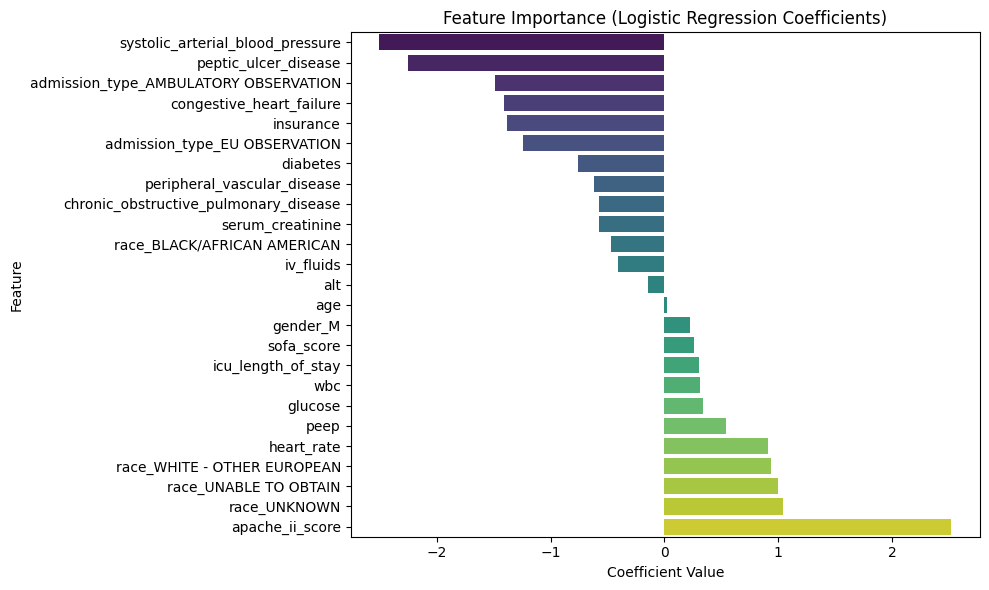

In [29]:
# Feature importance
import matplotlib.pyplot as plt
import seaborn as sns

# Get coefficients from backward elimination model
coef_series = pd.Series(be_model.params.drop("const"), name="Coefficient")
coef_series = coef_series.sort_values()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coef_series.values, y=coef_series.index, palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


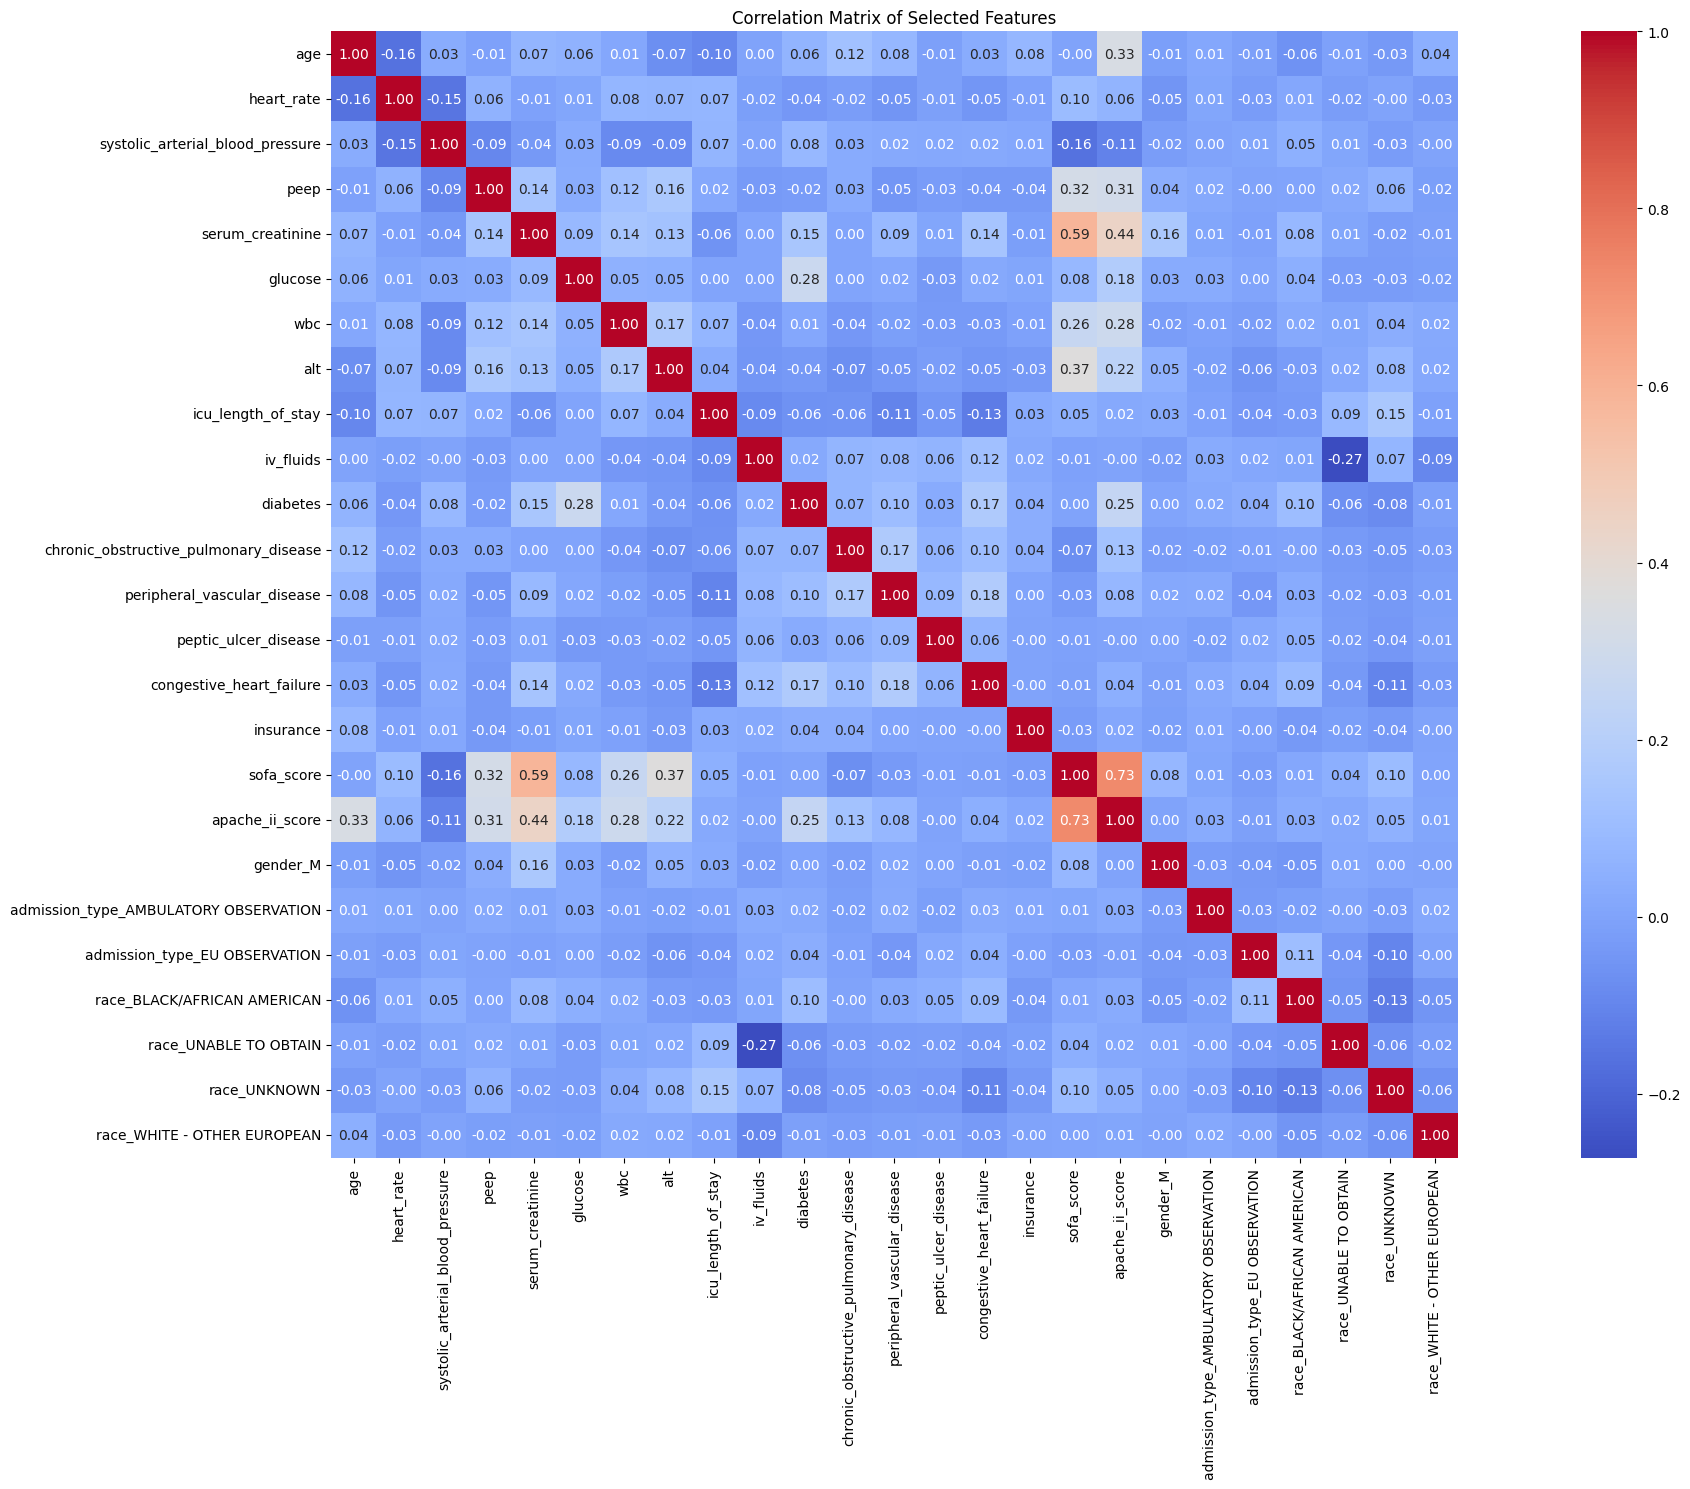

In [30]:
# Correlation Matrix
# Drop 'const' if it's in the final_features list
selected_features_only = [f for f in final_features if f != 'const']

# Compute correlation matrix
correlation_matrix = X_train[selected_features_only].corr()

# Plot heatmap
plt.figure(figsize=(25, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title("Correlation Matrix of Selected Features")
plt.tight_layout()
plt.show()


In [31]:
# Handling data imbalance with SMOTE
from imblearn.over_sampling import SMOTE

# Display class distribution before SMOTE
print("Class Distribution BEFORE SMOTE:")
print(y_train.value_counts())

# Use only selected features from X_train
X_train_final = X_train[selected_features_only]  # already aligned with y_train

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_final, y_train)

# Check class distribution after SMOTE
print("After SMOTE:")
print(y_train_resampled.value_counts())

Class Distribution BEFORE SMOTE:
in_hospital_mortality
0    2772
1     729
Name: count, dtype: int64
After SMOTE:
in_hospital_mortality
0    2772
1    2772
Name: count, dtype: int64


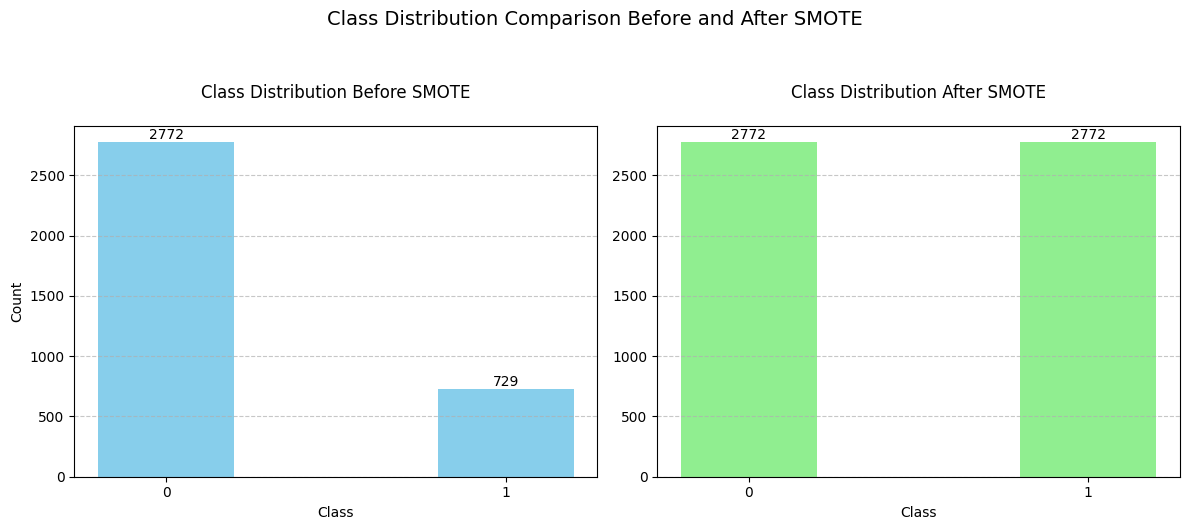


Exact Counts:
Before SMOTE - Class 0: 2772, Class 1: 729
After SMOTE  - Class 0: 2772, Class 1: 2772


In [32]:
# SMOTE visualizations
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Count classes
before_counts = Counter(y_train)
after_counts = Counter(y_train_resampled)

# Convert to DataFrame with explicit 0 and 1 classes
classes = [0, 1]
before_df = pd.DataFrame({'Class': classes,
                         'Count': [before_counts.get(0, 0), before_counts.get(1, 0)]})
after_df = pd.DataFrame({'Class': classes,
                        'Count': [after_counts.get(0, 0), after_counts.get(1, 0)]})

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE plot
bars1 = ax1.bar(before_df['Class'], before_df['Count'], color='skyblue', width=0.4)
ax1.set_title("Class Distribution Before SMOTE", pad=20)
ax1.set_xlabel("Class")
ax1.set_ylabel("Count")
ax1.set_xticks(classes)
ax1.set_xticklabels(['0', '1'])
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Add exact counts on top of bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# After SMOTE plot
bars2 = ax2.bar(after_df['Class'], after_df['Count'], color='lightgreen', width=0.4)
ax2.set_title("Class Distribution After SMOTE", pad=20)
ax2.set_xlabel("Class")
ax2.set_xticks(classes)
ax2.set_xticklabels(['0', '1'])
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add exact counts on top of bars
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

# Add a title for the entire figure
fig.suptitle("Class Distribution Comparison Before and After SMOTE", y=1.05, fontsize=14)
plt.tight_layout()
plt.show()

# Print exact numbers
print("\nExact Counts:")
print(f"Before SMOTE - Class 0: {before_counts.get(0, 0)}, Class 1: {before_counts.get(1, 0)}")
print(f"After SMOTE  - Class 0: {after_counts.get(0, 0)}, Class 1: {after_counts.get(1, 0)}")


Training Random Forest...

Training XGBoost...

Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2772, number of negative: 2772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002159 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3092
[LightGBM] [Info] Number of data points in the train set: 5544, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training SVM...

Training KNN...

Training Logistic Regression...

Evaluation Results:
              Model  Accuracy  Sensitivity  Specificity  ROC-AUC  95% CI Lower  95% CI Upper
      Random Forest  0.831050     0.600000     0.895044 0.868490      0.830212      0.831889
            XGBoost  0.823059     0.615789     0.880466 0.852816      0.8222

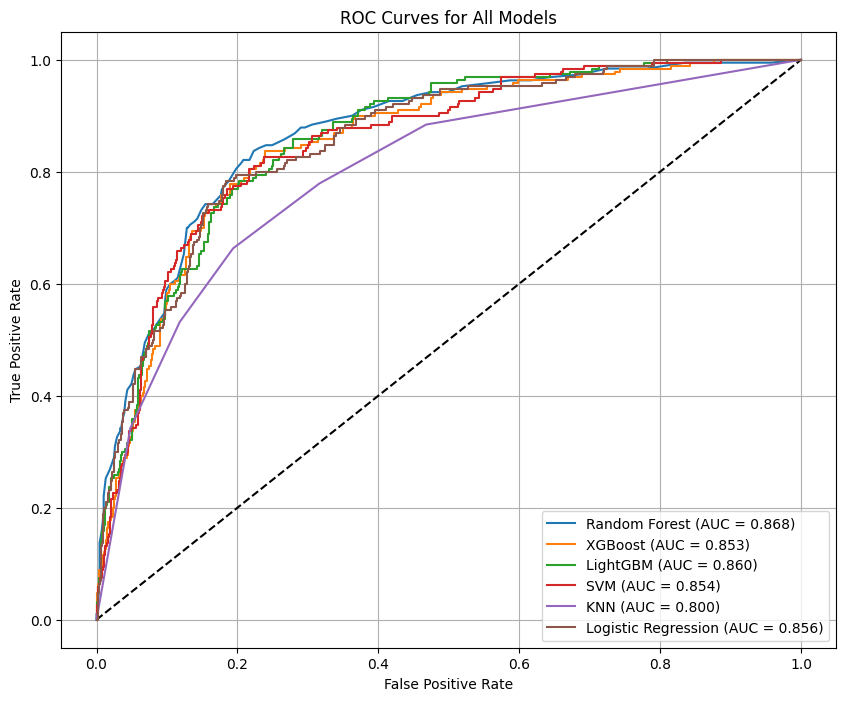

In [36]:
# Model training
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, roc_auc_score,
                             roc_curve, confusion_matrix)
import matplotlib.pyplot as plt
from scipy import stats


# Prepare test set with same features
X_test_final = X_test[selected_features_only]

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Models that need scaling
models_need_scaling = ["SVM", "KNN", "Logistic Regression"]

# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_final)

results = []
roc_data = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in models_need_scaling:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train_resampled
        X_test_model = X_test_final

    # Train model
    model.fit(X_train_model, y_train_resampled)

    # Predictions
    y_pred = model.predict(X_test_model)
    y_prob = model.predict_proba(X_test_model)[:, 1]

    # Calculate metrics
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)  # same as recall
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Calculate 95% CI for accuracy
    n = len(y_test)
    accuracy_se = np.sqrt(accuracy * (1 - accuracy)) / n
    ci_lower = accuracy - 1.96 * accuracy_se
    ci_upper = accuracy + 1.96 * accuracy_se

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "ROC-AUC": roc_auc,
        "95% CI Lower": ci_lower,
        "95% CI Upper": ci_upper
    })

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[name] = (fpr, tpr, roc_auc)

# Display results
results_df = pd.DataFrame(results)
print("\nEvaluation Results:")
print(results_df.to_string(index=False))

# Plot combined ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Training Random Forest...


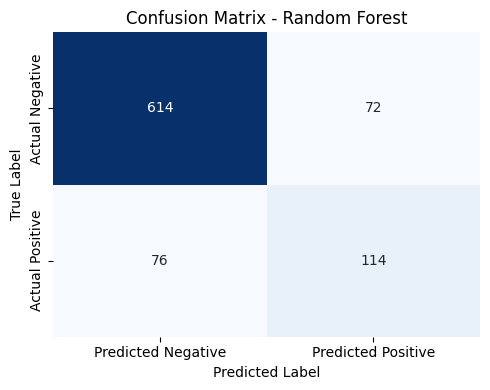


Training XGBoost...


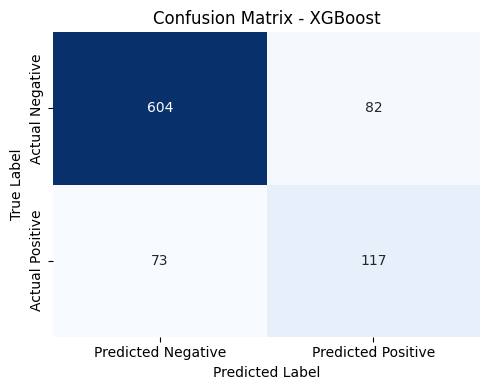


Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2772, number of negative: 2772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3092
[LightGBM] [Info] Number of data points in the train set: 5544, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


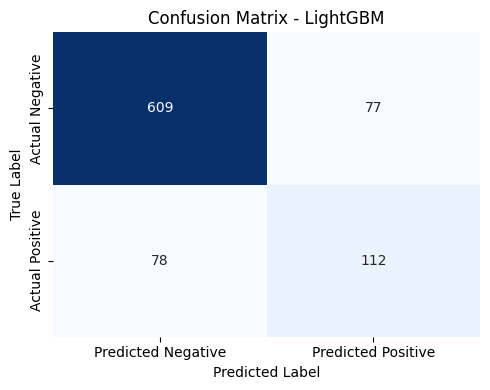


Training SVM...


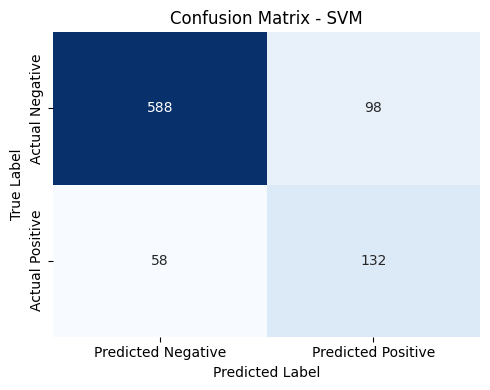


Training KNN...


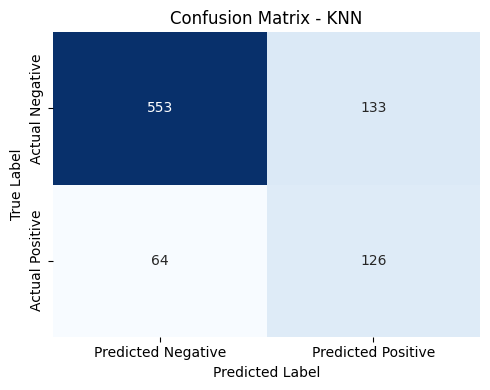


Training Logistic Regression...


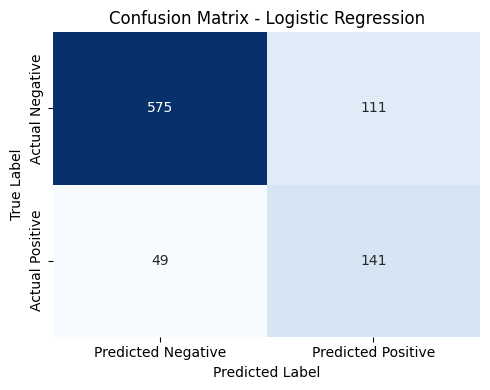


Evaluation Results:
              Model  Accuracy  Sensitivity  Specificity  ROC-AUC
      Random Forest  0.831050     0.600000     0.895044 0.868490
            XGBoost  0.823059     0.615789     0.880466 0.852816
           LightGBM  0.823059     0.589474     0.887755 0.860066
                SVM  0.821918     0.694737     0.857143 0.854174
                KNN  0.775114     0.663158     0.806122 0.799705
Logistic Regression  0.817352     0.742105     0.838192 0.856184


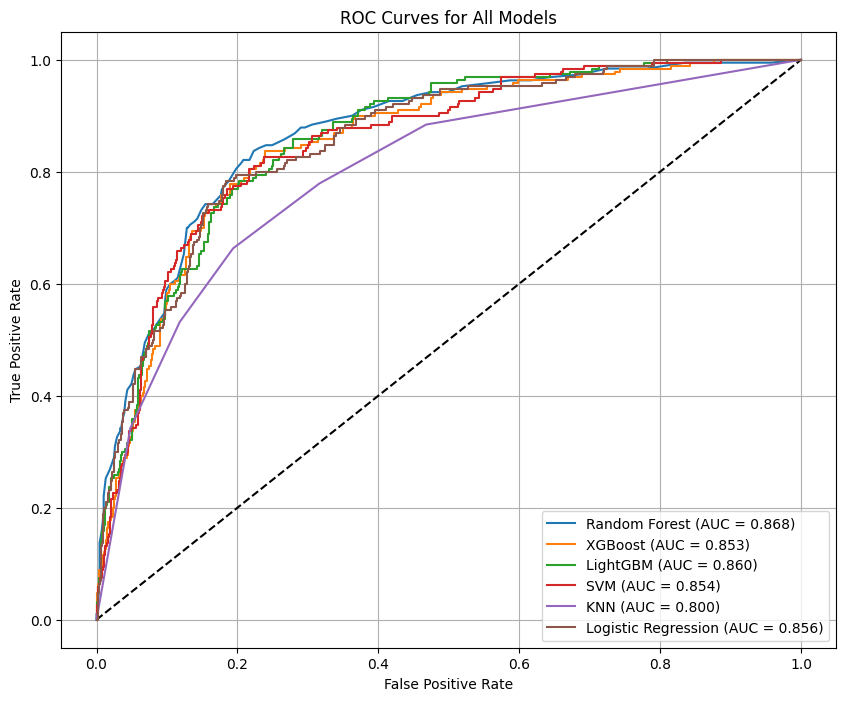

In [36]:
# Confusion matrix and evaluations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, roc_auc_score,
                           roc_curve, confusion_matrix)

# Assuming you have these variables defined:
# X_train_resampled, y_train_resampled, X_test, y_test, selected_features_only

# Prepare test set with same features
X_test_final = X_test[selected_features_only]

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True),
    "KNN": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(random_state=42)
}

# Models that need scaling
models_need_scaling = ["SVM", "KNN", "Logistic Regression"]

# Scale features for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test_final)

results = []
roc_data = {}

# Train and evaluate models
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in models_need_scaling:
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        X_train_model = X_train_resampled
        X_test_model = X_test_final

    # Train model
    model.fit(X_train_model, y_train_resampled)

    # Predictions
    y_pred = model.predict(X_test_model)
    y_prob = model.predict_proba(X_test_model)[:, 1]

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Store results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "ROC-AUC": roc_auc
    })

    # Store ROC curve data
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[name] = (fpr, tpr, roc_auc)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

# Display results
results_df = pd.DataFrame(results)
print("\nEvaluation Results:")
print(results_df.to_string(index=False))

# Plot combined ROC curve
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Statistical Validation Results:
                              Feature        Type       Test  p-value  Significant (p < 0.05)
                           subject_id   Numerical     t-test 0.643556                   False
                               height   Numerical     t-test      NaN                   False
                               weight   Numerical     t-test 0.768760                   False
                                  bmi   Numerical     t-test      NaN                   False
                                  age   Numerical     t-test 0.883816                   False
                           heart_rate   Numerical     t-test 0.338875                   False
                     respiratory_rate   Numerical     t-test 0.313173                   False
                          temperature   Numerical     t-test      NaN                   False
                                 spo2   Numerical     t-test 0.338717                   False
                            

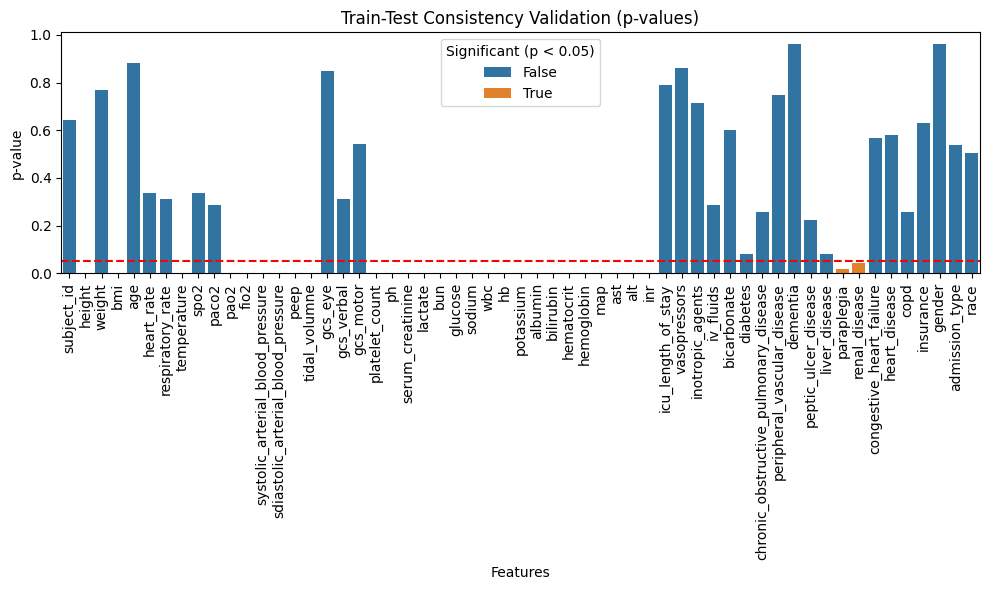

In [38]:
# Statistical Analysis
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.model_selection import train_test_split

def validate_train_test_consistency(X, y, test_size=0.2, random_state=42):
    """
    Validate statistical consistency between train and test sets
    Returns: (DataFrame with test results, original feature types)
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # Detect feature types
    numeric_cols = X.select_dtypes(include=np.number).columns.tolist()
    categorical_cols = X.select_dtypes(exclude=np.number).columns.tolist()

    results = []

    # Analyze numerical features with t-tests
    for col in numeric_cols:
        t_stat, p_val = ttest_ind(X_train[col], X_test[col], equal_var=False)
        results.append({
            'Feature': col,
            'Type': 'Numerical',
            'Test': 't-test',
            'p-value': p_val,
            'Significant (p < 0.05)': p_val < 0.05
        })

    # Analyze categorical features with chi-square tests
    for col in categorical_cols:
        # Create contingency table
        contingency = pd.crosstab(
            pd.concat([X_train[col], X_test[col]]),
            ['Train'] * len(X_train) + ['Test'] * len(X_test)
        )

        # Handle sparse categories
        if contingency.shape[0] > 1 and contingency.shape[1] > 1:
            chi2, p_val, _, _ = chi2_contingency(contingency)
            test_used = 'chi-square'
        else:
            p_val = np.nan
            test_used = 'Not applicable'

        results.append({
            'Feature': col,
            'Type': 'Categorical',
            'Test': test_used,
            'p-value': p_val,
            'Significant (p < 0.05)': p_val < 0.05 if not np.isnan(p_val) else np.nan
        })

    # Target variable consistency check
    if str(y.dtype) == 'object' or y.nunique() < 10:  # Categorical target
        contingency = pd.crosstab(
            pd.concat([y_train, y_test]),
            ['Train'] * len(y_train) + ['Test'] * len(y_test)
        )
        chi2, p_val, _, _ = chi2_contingency(contingency)
        test_used = 'chi-square'
    else:  # Numerical target
        t_stat, p_val = ttest_ind(y_train, y_test, equal_var=False)
        test_used = 't-test'

    results.append({
        'Feature': 'Target',
        'Type': 'Categorical' if test_used == 'chi-square' else 'Numerical',
        'Test': test_used,
        'p-value': p_val,
        'Significant (p < 0.05)': p_val < 0.05
    })

    return pd.DataFrame(results), {'numeric': numeric_cols, 'categorical': categorical_cols}

# Usage example:
# Assuming X is your feature matrix and y is your target variable
validation_results, feature_types = validate_train_test_consistency(X, y)

# Display results
print("Statistical Validation Results:")
print(validation_results.to_string(index=False))

# Summary statistics
print("\nSummary of Significant Differences:")
print(f"Total features tested: {len(validation_results)-1}")
print(f"Numerical features with significant differences: {validation_results[validation_results['Type']=='Numerical']['Significant (p < 0.05)'].sum()}")
print(f"Categorical features with significant differences: {validation_results[validation_results['Type']=='Categorical']['Significant (p < 0.05)'].sum()}")
print(f"Target variable significant difference: {validation_results[validation_results['Feature']=='Target']['Significant (p < 0.05)'].values[0]}")

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Feature',
    y='p-value',
    hue='Significant (p < 0.05)',
    data=validation_results[validation_results['Feature'] != 'Target']
)
plt.axhline(y=0.05, color='red', linestyle='--')
plt.title('Train-Test Consistency Validation (p-values)')
plt.xticks(rotation=90)
plt.ylabel('p-value')
plt.xlabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# !pip install optuna

Best KNN Params: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2772, number of negative: 2772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001199 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3092
[LightGBM] [Info] Number of data points in the train set: 5544, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

[I 2025-04-20 03:29:19,721] A new study created in memory with name: no-name-5ede6549-6b61-4b45-a0e6-61163f1465a0


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<ipython-input-38-b756e62d8414>:67: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.01, 10)
[I 2025-04-20 03:29:25,310] Trial 0 finished with value: 0.858420285407396 and parameters: {'C': 0.1159527426427917, 'kernel': 'poly'}. Best is trial 0 with value: 0.858420285407396.
<ipython-input-38-b756e62d8414>:67: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.01, 10)
[I 2025-04-20 03:29:41,370] Trial 1 finished with value: 0.8575341414761394 and parameters: {'C': 4.678536727352191, 'kernel': 'linear'}. Best is trial 0 with value: 0.858420285407396.
<ipython-input-38-b756e62d8414>:67: FutureWarning: suggest

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 2772, number of negative: 2772
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3092
[LightGBM] [Info] Number of data points in the train set: 5544, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

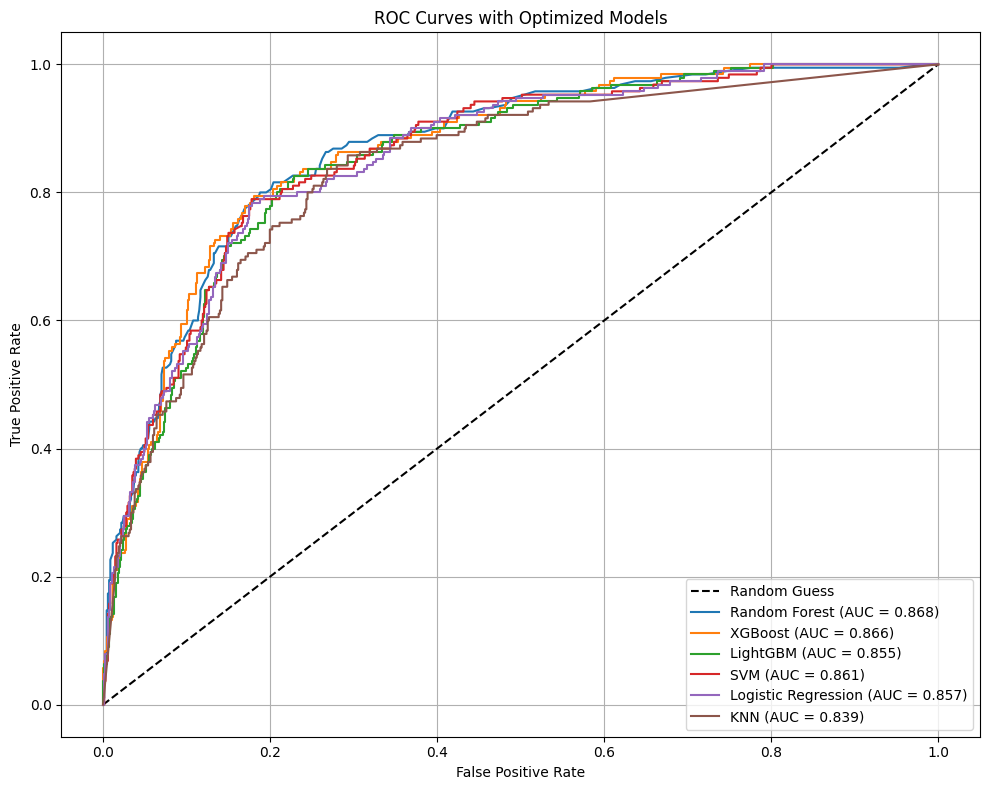

In [38]:
# Hyperparameter tuning
import numpy as np
import pandas as pd
import shap
import optuna
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, recall_score, roc_auc_score,
                             roc_curve, confusion_matrix)
from sklearn.utils import resample

# Hyperparameter tuning for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='roc_auc', n_jobs=-1)
grid_knn.fit(X_train_scaled, y_train_resampled)
best_knn = grid_knn.best_estimator_
best_knn_params = grid_knn.best_params_
print("Best KNN Params:", best_knn_params)

# Tune Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1)
grid_rf.fit(X_train_resampled, y_train_resampled)
best_rf = grid_rf.best_estimator_

# Tune Logistic Regression
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(random_state=42, max_iter=500), param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1)
grid_lr.fit(X_train_scaled, y_train_resampled)
best_lr = grid_lr.best_estimator_

# Tune XGBoost
random_xgb = RandomizedSearchCV(XGBClassifier(random_state=42, eval_metric='logloss'),
                                param_distributions={'n_estimators': [50, 100, 200],
                                                     'max_depth': [3, 6, 9],
                                                     'learning_rate': [0.01, 0.05, 0.1]},
                                n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
random_xgb.fit(X_train_resampled, y_train_resampled)
best_xgb = random_xgb.best_estimator_

# Tune LightGBM
random_lgb = RandomizedSearchCV(LGBMClassifier(random_state=42),
                                param_distributions={'n_estimators': [50, 100, 200],
                                                     'max_depth': [3, 6, 9],
                                                     'learning_rate': [0.01, 0.05, 0.1]},
                                n_iter=10, cv=5, scoring='roc_auc', n_jobs=-1)
random_lgb.fit(X_train_resampled, y_train_resampled)
best_lgb = random_lgb.best_estimator_

# Optuna for SVM
def objective(trial):
    C = trial.suggest_loguniform("C", 0.01, 10)
    kernel = trial.suggest_categorical("kernel", ["linear", "rbf", "poly"])
    model = SVC(C=C, kernel=kernel, probability=True, random_state=42)
    model.fit(X_train_scaled, y_train_resampled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    return roc_auc_score(y_test, y_prob)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)
best_svm_params = study.best_params

# Store best models
best_models = {
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "LightGBM": best_lgb,
    "SVM": SVC(**best_svm_params, probability=True),
    "Logistic Regression": best_lr,
    "KNN": best_knn
}

# Function to get 95% CI for ROC-AUC via bootstrapping
def bootstrap_auc_ci(y_true, y_prob, n_bootstraps=1000, ci=0.95):
    bootstrapped_scores = []
    rng = np.random.RandomState(42)

    for _ in range(n_bootstraps):
        indices = rng.randint(0, len(y_true), len(y_true))
        if len(np.unique(y_true[indices])) < 2:
            continue
        score = roc_auc_score(y_true[indices], y_prob[indices])
        bootstrapped_scores.append(score)

    sorted_scores = np.array(bootstrapped_scores)
    sorted_scores.sort()
    lower_idx = int((1.0 - ci) / 2 * len(sorted_scores))
    upper_idx = int((1.0 + ci) / 2 * len(sorted_scores))
    return sorted_scores[lower_idx], sorted_scores[upper_idx]

# Evaluate models
results = []
roc_data = {}

for name, model in best_models.items():
    X_train_model = X_train_scaled if name in ["SVM", "Logistic Regression", "KNN"] else X_train_resampled
    X_test_model = X_test_scaled if name in ["SVM", "Logistic Regression", "KNN"] else X_test_final

    model.fit(X_train_model, y_train_resampled)

    y_pred = model.predict(X_test_model)
    y_prob = model.predict_proba(X_test_model)[:, 1]

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    accuracy = accuracy_score(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)
    specificity = tn / (tn + fp)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Compute 95% CI for ROC AUC using bootstrap
    lower_ci, upper_ci = bootstrap_auc_ci(np.array(y_test), np.array(y_prob))

    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "ROC-AUC": roc_auc,
        "95% CI Lower": lower_ci,
        "95% CI Upper": upper_ci
    })

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_data[name] = (fpr, tpr, roc_auc)

# Display results
results_df = pd.DataFrame(results)
pd.set_option('display.float_format', lambda x: f'{x:.4f}')
print("\nEvaluation Results with 95% CI:")
print(results_df.to_string(index=False))

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

for name, (fpr, tpr, auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with Optimized Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


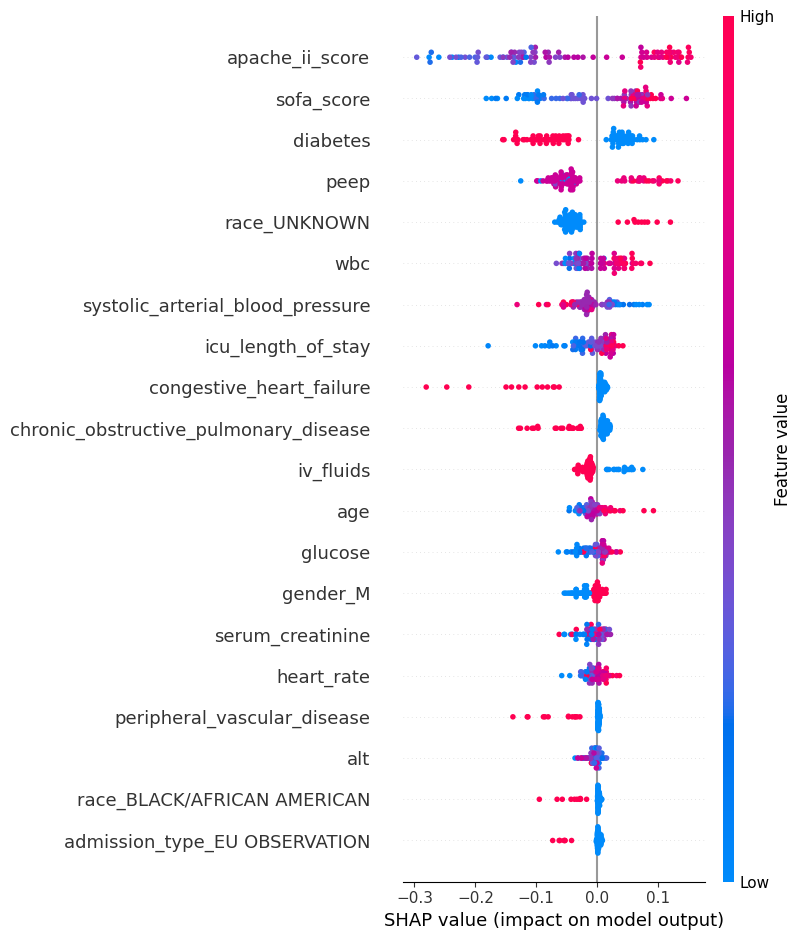

In [51]:
# SHAP
import shap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Get the Random Forest model
rf_model = best_rf
if rf_model is None:
    raise ValueError("Random Forest model not found.")

# Create SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Select appropriate test data
X_test_for_shap = X_test_scaled if "Random Forest" in models_need_scaling else X_test_final

# Convert to DataFrame
X_test_df = pd.DataFrame(X_test_for_shap, columns=selected_features_only)

# Sample data to speed up SHAP calculations
sample_size = min(100, X_test_df.shape[0])
sampled_test_data = X_test_df.iloc[:sample_size]

# Compute SHAP values
shap_values = explainer.shap_values(sampled_test_data)

# Handle classification cases
if isinstance(shap_values, list):
    shap_values_for_analysis = shap_values[1] if len(shap_values) > 1 else shap_values[0]
elif len(shap_values.shape) == 3:
    shap_values_for_analysis = shap_values[:, :, 1]
else:
    shap_values_for_analysis = shap_values

# Compute SHAP feature importance
feature_importance = np.abs(shap_values_for_analysis).mean(axis=0)
importance_df = pd.DataFrame({
    'Feature': selected_features_only,
    'SHAP_Importance': feature_importance
}).sort_values('SHAP_Importance', ascending=False)


# SHAP summary plots
shap.summary_plot(shap_values_for_analysis, sampled_test_data)
